<a href="https://colab.research.google.com/github/AlthafAk/Chennai-house-price-prediction/blob/Master/Chennai_House_Price_Prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GUVI -IITM Advance programming and Master data science**

1.   Name : Althaf
2.   Batch : D13A
3.   Project name : Chennai house price prediction
4.   Mailid : althaf101610@gmail.com





*Import libraries*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
df.corr()['SALES_PRICE']


INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330999
N_BATHROOM       0.108884
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020556
REG_FEE          0.878148
COMMIS           0.626275
SALES_PRICE      1.000000
Name: SALES_PRICE, dtype: float64

*Visualization of dataset*

In [8]:
def numerical(feature):
    sns.scatterplot(x=df[feature],y=df.SALES_PRICE,hue=df.REG_FEE,palette='Spectral')
def categorical(feature):
    plt.figure(figsize=(15,5))
    sns.barplot(x=df[feature],y=df.SALES_PRICE)

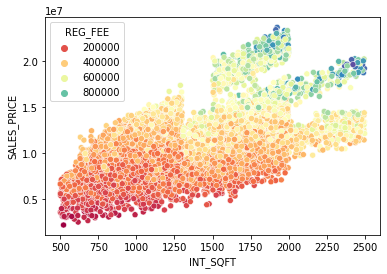

In [9]:
numerical('INT_SQFT')

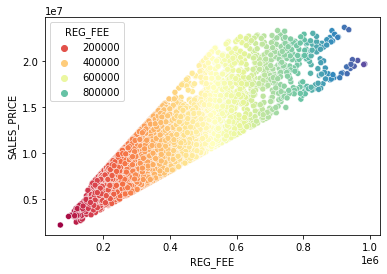

In [10]:
numerical('REG_FEE')

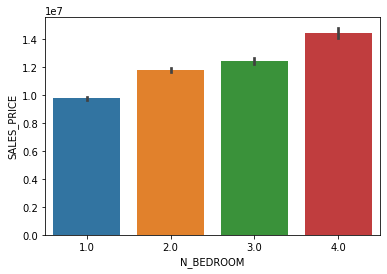

In [11]:
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE)

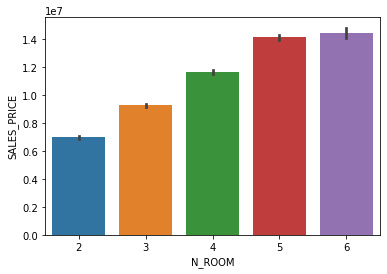

In [12]:
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE)

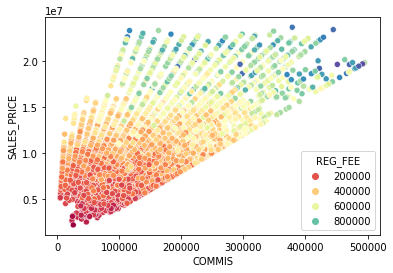

In [13]:
numerical('COMMIS')

In [14]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
df['build_to_sale']= (df.DATE_SALE - df.DATE_BUILD).dt.days
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,build_to_sale
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802


In [15]:
li = df.corr()['SALES_PRICE'].index
for i in df.columns:
    if i not in li:
        print(i)

PRT_ID
AREA
DATE_SALE
SALE_COND
PARK_FACIL
DATE_BUILD
BUILDTYPE
UTILITY_AVAIL
STREET
MZZONE


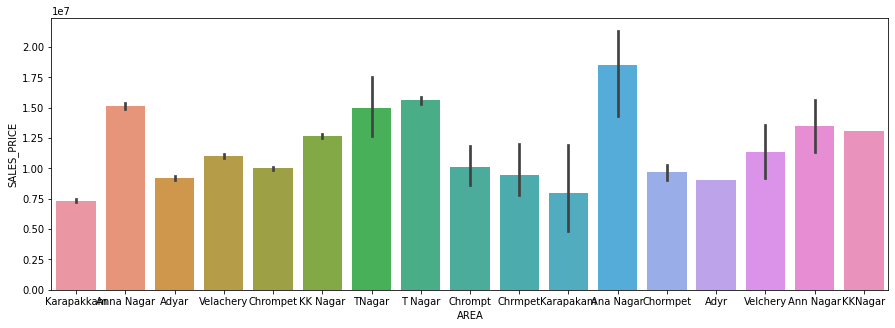

In [16]:
categorical('AREA')

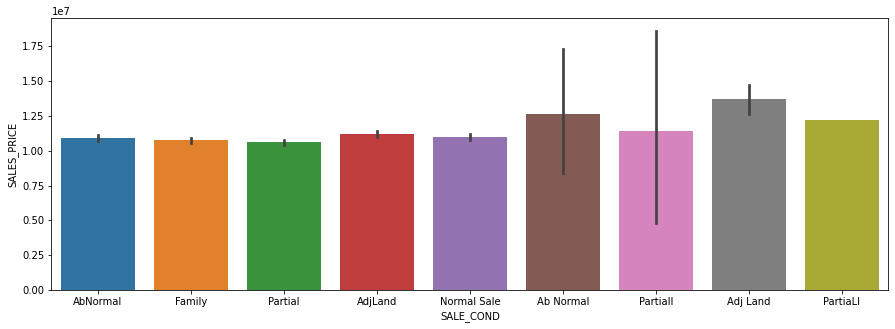

In [17]:
categorical('SALE_COND')

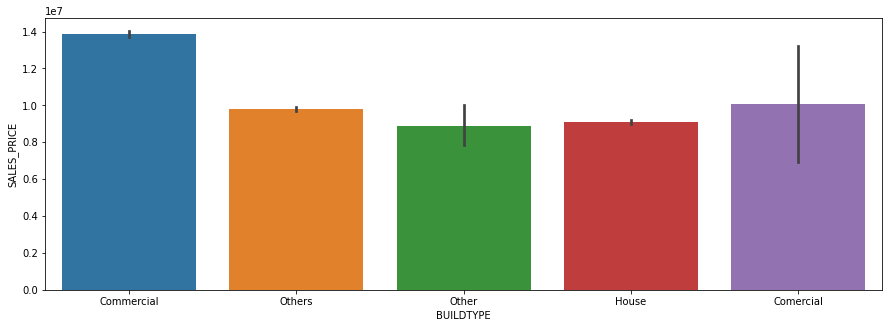

In [18]:
categorical('BUILDTYPE')

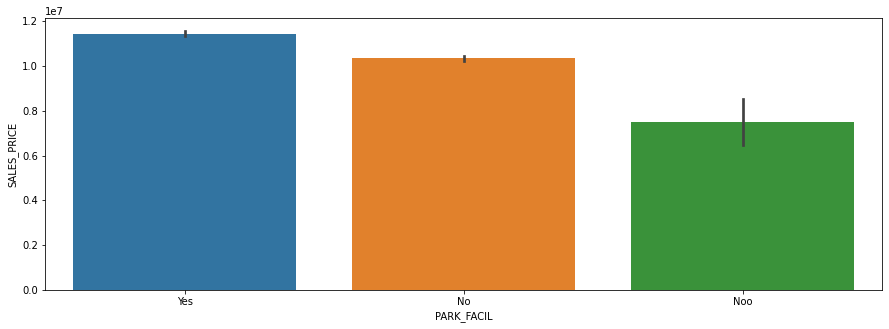

In [19]:
categorical('PARK_FACIL')

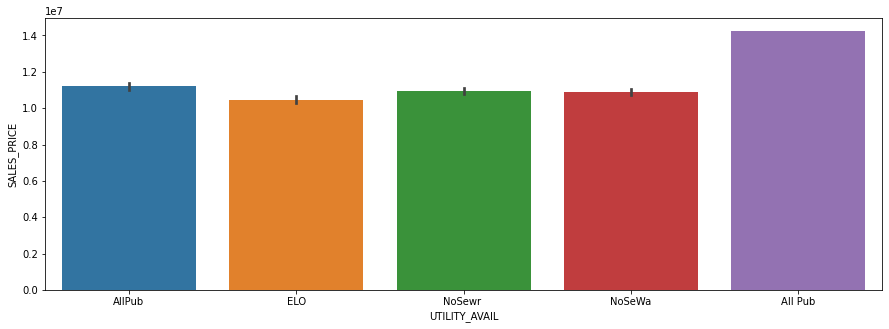

In [20]:
categorical('UTILITY_AVAIL')

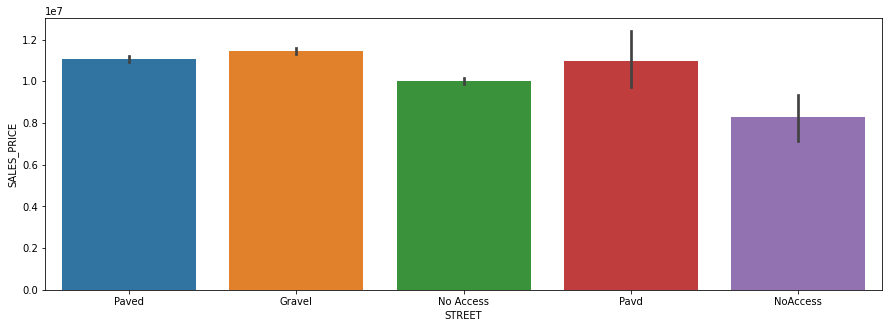

In [21]:
categorical('STREET')

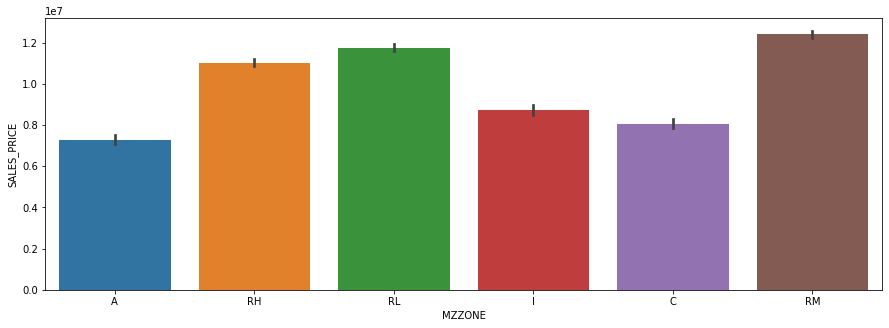

In [22]:
categorical('MZZONE')

In [23]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,build_to_sale
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802


In [24]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)


SALES_PRICE      1.000000
REG_FEE          0.878148
COMMIS           0.626275
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330999
N_BATHROOM       0.108884
QS_ROOMS         0.021967
QS_OVERALL       0.020556
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
QS_BATHROOM     -0.011377
build_to_sale   -0.119285
Name: SALES_PRICE, dtype: float64

*Multi-variate Analysis*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


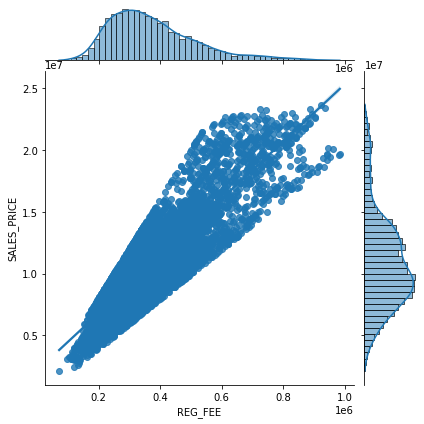

In [25]:
sns.jointplot(df.REG_FEE,df.SALES_PRICE,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


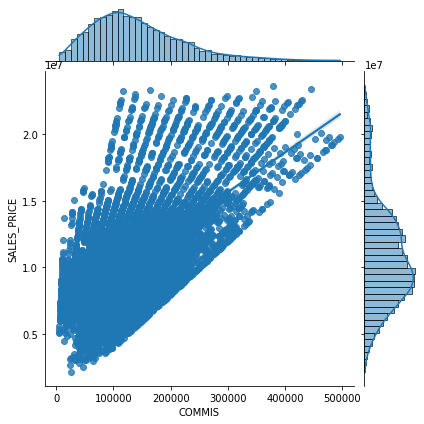

In [26]:
sns.jointplot(df.COMMIS,df.SALES_PRICE,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


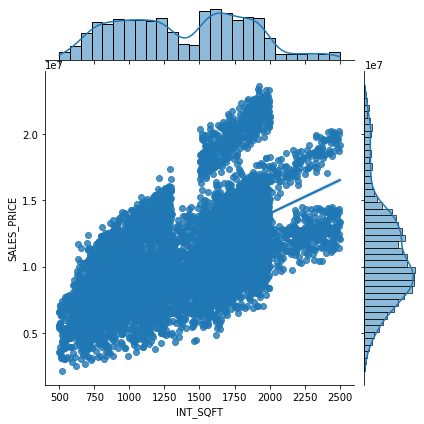

In [27]:
sns.jointplot(df.INT_SQFT,df.SALES_PRICE,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


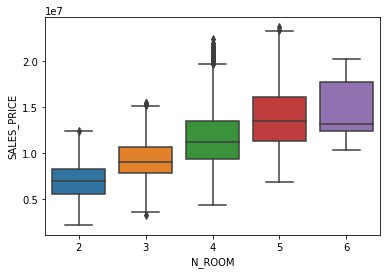

In [28]:
sns.boxplot(df.N_ROOM,df.SALES_PRICE)

In [29]:
df[df.N_ROOM<6].corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
REG_FEE          0.880540
COMMIS           0.613763
INT_SQFT         0.606349
N_ROOM           0.598389
N_BEDROOM        0.284661
N_BATHROOM       0.046137
QS_ROOMS         0.021851
QS_OVERALL       0.019446
DIST_MAINROAD    0.018330
QS_BEDROOM       0.018327
QS_BATHROOM     -0.012820
build_to_sale   -0.101886
Name: SALES_PRICE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


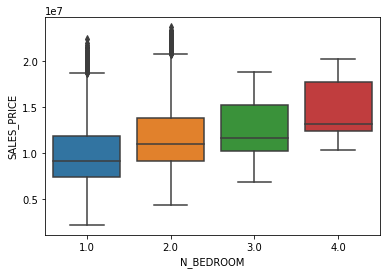

In [30]:
sns.boxplot(df.N_BEDROOM,df.SALES_PRICE)

*Imputation and Wrangling*

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [32]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [33]:
area = {'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar','Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar'}
df.AREA = df.AREA.replace(area)

In [34]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [35]:
cond = {'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'}
df.SALE_COND = df.SALE_COND.replace(cond)

In [36]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [37]:
park = {'Noo':'No'}
df.PARK_FACIL = df.PARK_FACIL.replace(park)

In [38]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [39]:
df.BUILDTYPE = df.BUILDTYPE.replace({'Comercial':'Commercial','Other':'Others'})

In [40]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [41]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({'All Pub':'AllPub'})

In [42]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [43]:
df.STREET = df.STREET.replace({'NoAccess':'No Access','Pavd':'Paved'})

In [44]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [45]:
df.QS_OVERALL = (df.QS_BATHROOM + df.QS_BEDROOM + df.QS_ROOMS)/3
df[df.QS_OVERALL.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,build_to_sale


In [46]:
df[df.N_BEDROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,build_to_sale
4060,P01066,Anna Nagar,1556,2013-01-16,181,NaN,1.0,4,Partial,No,...,No Access,RM,4.8,2.7,2.0,3.166667,313136,107978,10797790,9855


In [47]:
df[(df.AREA=='Anna Nagar') & (df.N_ROOM==4) & (df.N_BATHROOM==1)]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,build_to_sale
34,P05950,Anna Nagar,1709,2009-11-22,130,1.0,1.0,4,Family,No,...,Gravel,RH,4.8,3.2,4.3,4.100000,452501,90500,12928590,2190
47,P06006,Anna Nagar,1710,2009-12-11,15,1.0,1.0,4,Normal Sale,Yes,...,Gravel,RH,2.7,4.0,2.2,2.966667,808639,161728,20215970,4044
65,P01247,Anna Nagar,1600,2012-09-30,154,1.0,1.0,4,Family,Yes,...,Gravel,RH,3.9,2.7,2.5,3.033333,309941,166891,11920820,7783
75,P03590,Anna Nagar,1792,2011-02-21,41,1.0,1.0,4,Family,Yes,...,Gravel,RM,2.7,2.6,2.0,2.433333,514532,250313,13906270,7665
101,P08848,Anna Nagar,1622,2007-07-26,147,1.0,1.0,4,Family,Yes,...,Gravel,RL,4.4,3.7,4.2,4.100000,378840,209015,13063450,1825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,P00748,Anna Nagar,1598,2013-08-20,121,1.0,1.0,4,AdjLand,Yes,...,Paved,RM,2.5,4.6,2.3,3.133333,508658,203463,12716450,16425
7052,P02116,Anna Nagar,1508,2011-08-12,63,1.0,1.0,4,AbNormal,No,...,No Access,RH,2.0,3.4,4.3,3.233333,373074,165811,10363160,14847
7070,P01473,Anna Nagar,1514,2012-04-16,72,1.0,1.0,4,AdjLand,No,...,No Access,RM,4.5,4.4,5.0,4.633333,330127,91070,11383690,11680
7078,P00469,Anna Nagar,1622,2014-03-24,109,1.0,1.0,4,AbNormal,Yes,...,No Access,RL,3.4,4.4,2.9,3.566667,355700,118567,13174060,5475


In [48]:
df.N_BEDROOM.fillna(1.0,inplace=True)

In [49]:
df[df.N_BATHROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,build_to_sale
70,P05304,Anna Nagar,1589,2010-03-22,39,1.0,NaN,4,Partial,No,...,Gravel,RL,2.1,2.5,4.5,3.033333,451857,85486,12212350,16117
5087,P01333,Chrompet,1016,2012-02-08,105,1.0,NaN,3,AbNormal,Yes,...,Gravel,RM,3.2,4.2,2.0,3.133333,330086,106479,10647920,11445
6134,P01332,Chrompet,916,2012-02-08,173,1.0,NaN,3,Normal Sale,Yes,...,Paved,RL,3.4,3.5,3.0,3.300000,265423,44237,8847420,13576
6371,P01189,Chrompet,1035,2012-06-11,90,1.0,NaN,3,Partial,No,...,No Access,RM,2.3,3.5,3.2,3.000000,223403,24823,8274200,11167
6535,P09189,Anna Nagar,1864,2007-05-03,184,2.0,NaN,5,Family,Yes,...,Paved,RM,3.3,3.7,4.7,3.900000,575606,124455,15556920,3591


In [50]:
df[(df.AREA=='Chrompet')&(df.N_BEDROOM==1)&(df.N_ROOM==3)].N_BATHROOM.value_counts()

1.0    1142
Name: N_BATHROOM, dtype: int64

In [51]:
df.N_BATHROOM.fillna(1.0,inplace=True)

In [52]:
df.drop(['PRT_ID','DATE_SALE','DATE_BUILD'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,build_to_sale
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.266667,380000,144400,7600000,16031
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.866667,760122,304049,21717770,4015
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.366667,421094,92114,13159200,7152
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.066667,356321,77042,9630290,8030
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.200000,237000,74063,7406250,10802


In [53]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.266667,380000,...,0,0,0,0,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.866667,760122,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.366667,421094,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.066667,356321,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.200000,237000,...,0,0,0,0,0,1,0,0,0,0


In [54]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE              1.000000
REG_FEE                  0.878148
COMMIS                   0.626275
INT_SQFT                 0.612125
N_ROOM                   0.602760
AREA_Anna Nagar          0.400390
AREA_T Nagar             0.345020
N_BEDROOM                0.330987
MZZONE_RM                0.235134
AREA_KK Nagar            0.193062
PARK_FACIL_Yes           0.146428
MZZONE_RL                0.137466
N_BATHROOM               0.108834
SALE_COND_AdjLand        0.042032
STREET_Paved             0.032493
MZZONE_RH                0.022598
QS_ROOMS                 0.021967
QS_BEDROOM               0.018804
DIST_MAINROAD            0.018783
QS_OVERALL               0.016835
AREA_Velachery           0.016186
SALE_COND_Normal Sale    0.013178
UTILITY_AVAIL_NoSewr     0.004818
UTILITY_AVAIL_NoSeWa    -0.000290
QS_BATHROOM             -0.011377
SALE_COND_Family        -0.020856
SALE_COND_Partial       -0.037140
UTILITY_AVAIL_ELO       -0.058934
build_to_sale           -0.119285
AREA_Chrompet 

*Modelling*

In [59]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [56]:
X = df.drop('SALES_PRICE',axis=1)
y = df.SALES_PRICE

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,random_state=0,test_size=0.2)

In [61]:
kf = KFold(n_splits=10,shuffle=True)

In [66]:
XGB = XGBRegressor().fit(X_train,y_train)
cs = cross_val_score(lr,X_train,y_train,cv=kf)

[20:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [67]:
cs.mean()

0.9547237743369562

In [69]:
XGB.score(X_train,y_train), XGB.score(X_valid,y_valid)

(0.9633995320488273, 0.9556695196814707)

In [70]:
xx = XGBRegressor().fit(X_train,y_train)
xx.score(X_train,y_train), xx.score(X_valid,y_valid)

[20:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9633995320488273, 0.9556695196814707)